<a href="https://colab.research.google.com/github/Khushbu1985/GenerativeAI/blob/main/GBM_model_reason_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_titanic_train=pd.read_csv('https://raw.githubusercontent.com/Khushbu1985/GenerativeAI/main/titanic_train.csv')
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# df_train = df_titanic_train.replace(df_titanic_train.isna(),np.nan).fillna(0)
df_titanic_train['Cabin']=df_titanic_train['Cabin'].fillna('NA')

In [5]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S


In [6]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [45]:
df_titanic_train.column

AttributeError: 'DataFrame' object has no attribute 'column'

In [7]:
df_titanic_train['Age']=df_titanic_train['Age'].fillna(df_titanic_train['Age'].mean())

In [12]:
# for encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_titanic_train['Cabin'] = le.fit_transform(df_titanic_train['Cabin'])
df_titanic_train['Sex'] = le.fit_transform(df_titanic_train['Sex'])

In [13]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,22.0,1,0,7.2500,146
1,2,1,1,0,38.0,1,0,71.2833,81
2,3,1,3,0,26.0,0,0,7.9250,146
3,4,1,1,0,35.0,1,0,53.1000,55
4,5,0,3,1,35.0,0,0,8.0500,146


In [14]:
df_train= df_titanic_train

In [15]:
df_train.drop("Name", axis=1, inplace=True)
df_train.drop("Ticket", axis=1, inplace=True)
df_train.drop("Embarked", axis=1, inplace=True)

KeyError: "['Name'] not found in axis"

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,22.0,1,0,7.2500,146
1,2,1,1,0,38.0,1,0,71.2833,81
2,3,1,3,0,26.0,0,0,7.9250,146
3,4,1,1,0,35.0,1,0,53.1000,55
4,5,0,3,1,35.0,0,0,8.0500,146


In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['Cabin'] = le.fit_transform(df_train['Cabin'])
df_train['Sex'] = le.fit_transform(df_train['Sex'])
# df_train['Cabin']= df_train.apply(LabelEncoder().fit_transform)

In [17]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,129.974186
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,35.677211
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,146.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,146.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,146.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000


In [18]:
df_train['Cabin']= df_train['Cabin'].astype(str)
df_train['Sex']= df_train['Sex'].astype(str)
df_train['SibSp']= df_train['SibSp'].astype(str)
df_train['Parch']= df_train['Parch'].astype(str)

In [19]:
df_train.drop('Cabin', axis=1, inplace=True)

In [20]:
# for categorical descriptives
df_train.describe(include='object')

,Sex,SibSp,Parch
count,891,891,891
unique,2,7,7
top,1,0,0
freq,577,608,678


In [33]:
y_sum= df_train.groupby("Survived").count()

In [ ]:
ratio1=df_train['Survived'].sum()
ratio2=df_train['Survived'].count()

In [ ]:
x=ratio1/ratio2
x

0.3838383838383838

In [ ]:
# for Oversampling the data  --- DID NOT USE
import imblearn as iml
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.1)

Developing Random forest model for predictions

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [22]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [23]:
X=df_train.drop('Survived', axis=1)
X=X.drop('PassengerId', axis=1)

In [24]:
# y = df_train.iloc[:,1:2].values  # Target variable
# X = df_train.iloc[:,2:7].values  #features
# OR
y = df_train['Survived']

In [25]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


# Installing SHAP Package

In [26]:
# Alternative code for installing SHAP
# conda install -c conda-forge shap

SyntaxError: invalid syntax (<ipython-input-26-d078edfa0859>, line 1)

In [27]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


In [28]:
import numpy as np
import shap
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_breast_cancer

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create and fit the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
# Getting the feature list
feature_names = X.columns.tolist()
feature_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

Create Reason Code for Each Record

In [32]:
# Create a TreeExplainer object for the Gradient Boosting Model
explainer = shap.Explainer(gbm)

# Calculate the SHAP values for the test dataset
shap_values = explainer(X_test)

In [72]:
#  Create a function to generate reason codes
def generate_reason_codes(instance, shap_values, feature_names):
    instance_shap_values = shap_values.values[instance]
    sorted_indices = np.argsort(np.abs(instance_shap_values))[::-1]
    sorted_values = instance_shap_values[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]

    reason_codes = {
        "reasons": [
            {"feature": feature, "value": value, "impact": shap_value}
            for feature, value, shap_value in zip(sorted_feature_names, X_test.iloc[instance][sorted_indices], sorted_values)
        ]
    }

    return reason_codes

In [71]:
# cell_value = X_test.iloc[0, 1]
# cell_value
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
709,3,1,29.699118,1,1,15.2458
439,2,1,31.000000,0,0,10.5000
840,3,1,20.000000,0,0,7.9250
720,2,0,6.000000,0,1,33.0000
39,3,0,14.000000,1,0,11.2417
...,...,...,...,...,...,...
433,3,1,17.000000,0,0,7.1250
773,3,1,29.699118,0,0,7.2250
25,3,0,38.000000,1,5,31.3875
84,2,0,17.000000,0,0,10.5000


In [74]:
# Choose an instance from the test dataset for which you want to generate reason codes
instance= 0

# Generate the reason codes for the chosen instance
reason_codes = generate_reason_codes(instance, shap_values, feature_names)

# Display the reason codes
print(reason_codes)

{'reasons': [{'feature': 'Sex', 'value': '1', 'impact': -0.9291335675973483}, {'feature': 'Pclass', 'value': 3, 'impact': -0.3634845407519423}, {'feature': 'Fare', 'value': 15.2458, 'impact': -0.28066577591030356}, {'feature': 'Age', 'value': 29.69911764705882, 'impact': -0.18681898081461681}, {'feature': 'Parch', 'value': '1', 'impact': -0.12028230791069755}, {'feature': 'SibSp', 'value': '1', 'impact': 0.02778966858467893}]}


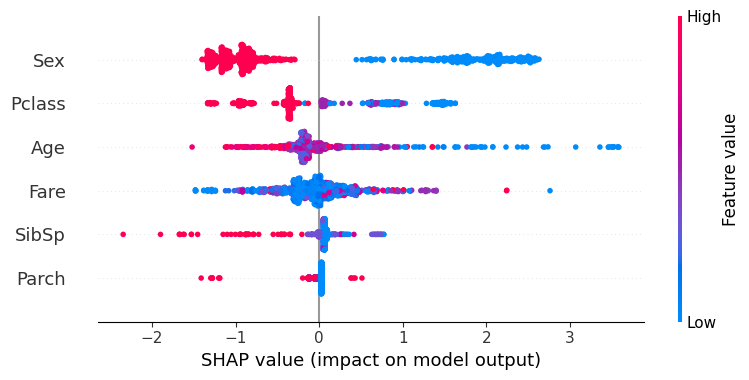

In [76]:
# Create a SHAP explainer object for the Gradient Boosting Model
explainer = shap.Explainer(gbm)

# Calculate the SHAP values for the entire dataset (combining both the training and testing sets)
shap_values = explainer(np.vstack((X_train, X_test)))

# Plot the SHAP summary for the entire dataset
shap.summary_plot(shap_values, np.vstack((X_train, X_test)), feature_names=feature_names)

# Display the plot
plt.show()

In [78]:
pip install optbinning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 29.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.4.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 whic

In [79]:
import numpy as np
import pandas as pd
import shap
from optbinning import OptimalBinning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_breast_cancer

(CVXPY) Apr 11 09:44:01 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 11 09:44:01 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [95]:
# df_train['Sex']= df_train['Sex'].astype(int)
# df_train['Age']= df_train['Age'].astype(int)
df_train['SibSp']= df_train['SibSp'].astype(int)
df_train['Parch']= df_train['Parch'].astype(int)
df_train['Fare']= df_train['Fare'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Fare         891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


In [96]:

# Load the dataset (in this example, we are using the breast cancer dataset)
# data = load_breast_cancer()
# X = data.data
# y = data.target

# Convert the dataset to a DataFrame
# df = pd.DataFrame(X, columns=data.feature_names)
# df['target'] = y

# Process the dataset with OptBinning
woe_df = pd.DataFrame()
optb_objects = {}
for feature in feature_names:
    optb = OptimalBinning(name=feature, dtype="numerical", solver="cp", monotonic_trend="auto", min_n_bins=2, max_n_bins=5)
    optb.fit(df_train[feature], df_train['Survived'])
    woe_df[feature] = optb.transform(df_train[feature], metric="woe")
    optb_objects[feature] = optb

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(woe_df, y, test_size=0.2, random_state=42)

# # Create and fit the Gradient Boosting Classifier
# gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
# gbm.fit(X_train, y_train)

# # Create a SHAP explainer object for the Gradient Boosting Model
# explainer = shap.Explainer(gbm)

# # Calculate the SHAP values for the test dataset
# shap_values = explainer(X_test)

# Helper function to find the corresponding WOE bucket for a given original value
def get_woe_bucket(feature, original_value, optb_object):
    # print(feature,original_value)
    import re
    binning_table = optb_object.binning_table.build()
    return_value = None
    for index, row in binning_table.iterrows():
        row["Bin"] = row["Bin"].replace('inf','1000000000.0')
        if (row["Bin"].startswith("Special") or row["Bin"].startswith("Missing")):
            continue
        interval_match = re.match(r'[\[\(]([^,]+), ([^\]\)]+)[\]\)]', row["Bin"])
        if interval_match:
            left, right = float(interval_match.group(1)), float(interval_match.group(2))
            if left <= original_value < right:
                return_value = str(row["Bin"])
                break
    return return_value
    # return None

In [97]:
# Create a function to generate reason codes
def generate_reason_codes(instance, shap_values, feature_names, original_df, woe_df, optb_objects):

    instance_shap_values = shap_values.values[instance]
    sorted_indices = np.argsort(np.abs(instance_shap_values))[::-1]
    sorted_values = instance_shap_values[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    # print(sorted_feature_names)

    woe_buckets = [
        optb_objects[feature].binning_table.build().loc[:, ["Bin", "Count", "Count (%)", "WoE"]]
        for feature in sorted_feature_names
    ]

    original_values_sorted = original_df.iloc[instance][sorted_indices]
    # print(original_values_sorted)
    corresponding_woe_buckets = [
        get_woe_bucket(feature, original_value , optb_objects[feature])
        for feature,original_value in zip(sorted_feature_names, original_values_sorted)
    ]
    # print(corresponding_woe_buckets)

    reason_codes = {
        "reasons": [
            {
                "feature": feature,
                "original_value": original_value,
                "woe_value": woe_value,
                # "woe_bucket": woe_bucket,
                "corresponding_woe_bucket": corresponding_woe_buckets,
                "impact": shap_value
            }
            for feature, original_value, woe_value, corresponding_woe_buckets, shap_value in zip(
                sorted_feature_names,
                original_df.iloc[instance][sorted_indices],
                woe_df.iloc[instance][sorted_indices],
                # woe_buckets,
                corresponding_woe_buckets,
                sorted_values
            )
        ]
    }

    return reason_codes

In [99]:
# Process the dataset with OptBinning

# Choose an instance from the test dataset for which you want to generate reason codes
instance = 0

# Generate the reason codes for the chosen instance
reason_codes = generate_reason_codes(instance, shap_values, feature_names, df_train.iloc[X_test.index], woe_df.iloc[X_test.index], optb_objects)

# Display the reason codes
print(reason_codes)

{'reasons': [{'feature': 'Sex', 'original_value': 1, 'woe_value': 0.9838327092415776, 'corresponding_woe_bucket': '[0.50, 1000000000.0)', 'impact': -1.1590543084610063}, {'feature': 'Age', 'original_value': 3, 'woe_value': 0.34196217291391967, 'corresponding_woe_bucket': '(-1000000000.0, 6.50)', 'impact': -0.8712003358159378}, {'feature': 'Pclass', 'original_value': 710, 'woe_value': 0.6664826567146918, 'corresponding_woe_bucket': '[2.50, 1000000000.0)', 'impact': 0.812297341497056}, {'feature': 'Fare', 'original_value': 1, 'woe_value': -0.1776753763191671, 'corresponding_woe_bucket': '(-1000000000.0, 8.50)', 'impact': -0.27620003362756923}, {'feature': 'SibSp', 'original_value': 1, 'woe_value': -0.5831025704541322, 'corresponding_woe_bucket': '[0.50, 2.50)', 'impact': 0.05949165735919309}, {'feature': 'Parch', 'original_value': 29, 'woe_value': -0.6773830607904409, 'corresponding_woe_bucket': '[1.50, 1000000000.0)', 'impact': 0.016021306307015693}]}


In [ ]:
# rf = RandomForestClassifier()
# rf.fit(X, y)

# GBM classifier

RandomForestClassifier()